# Housing Market 101 with Regression

In [10]:
from IPython.display import Image

In [23]:
import matplotlib.pyplot as plt
def show_image(name):
    plt.figure(figsize=(8,5))
    img = plt.imread('image/' + name)
    plt.imshow(img)

## Regression

Regression is a study of how to best fit a curve to summarize your data. It is one of the most powerful and well-studied types of supervised learning algorithms. In regression, we try to understand the data points by discovering the curve that might have generated them. In doing so, we seek an explanation for why the given data is scattered the way it is. The best fit curve gives us a model for explaining how the dataset might have been produced.

<h5>What is linear regression?</h5>

A linear regression is a Mathematical Model in which we tend to find the best fit for our data.

A simple regression technique is used to find tthe relationship between the two variables X any Y, X being the independent variable and Y being the dependent variable. Variable X is our input to the model and Variable Y is the output to our model. we are trying to predict Y based on X.

Our model will represent the expected relationship between X and Y.

The model might not be 100% accurate.The model is just what we're using as our belief about the relationship for prediction, but it's not 100% accurate, there's some error.

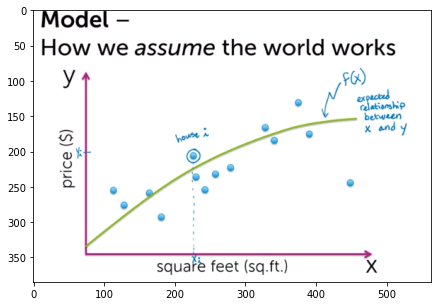

In [24]:
show_image("regression_2.png")

As the realtionship we are deriving is probabilistic, the model might not be 100% accurate.The model is just what we're using as our belief about the relationship for prediction, but it's not 100% accurate, there's some error.

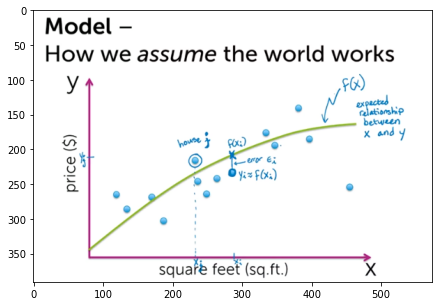

In [25]:
show_image("regression_3.png")

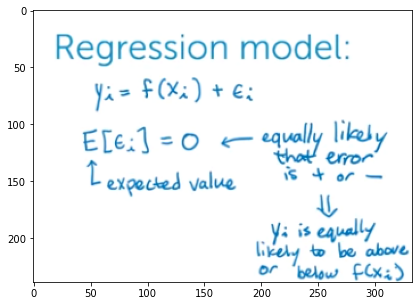

In [26]:
show_image("regression_4.png")

#### Here's how the machine learning pipeline works for the regression model.

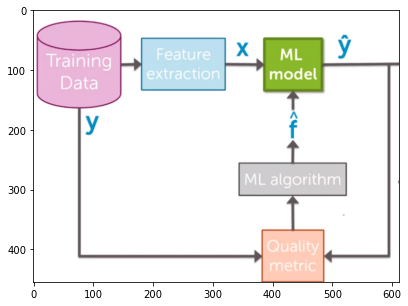

In [27]:
show_image("regression_5.png")

A simple Linear model is just intercept plus slope times our variable of interest so that we're gonna say that's <b>wo + w1x</b>. And what this regression model then specifies is that each one of our observations <b>yi</b> is simply that function evaluated at <b>xi</b>. So that's w0 plus <b>w1xI</b> plus the error term which we called epsilon i. So this is our regression model, and to be clear, this error, epsilon i, is the distance from our specific observation back down to the line.

The parameters of this model <b>w0</b> and <b>w1</b> are intercept and slope and we call these the regression coefficients. So that summarizes a very simple linear regression model.

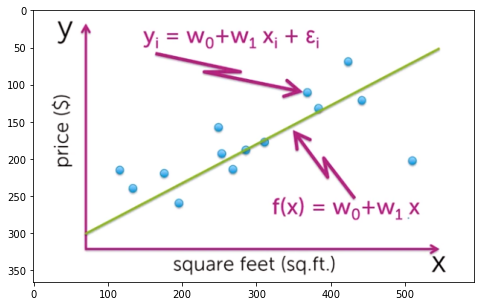

In [28]:
show_image("regression_6.png")

### Calculating the cost using the Residual Sum of Squares

Residual sum of squares is that we're just gonna add up the errors we made between this line here, which represents what we believe the relationship is, and what we've estimated the relationship to be between x and y. And what the actual observation y was. So we're gonna take each one of these errors or residuals.
#### A residual is the difference between a prediction and an actual value.

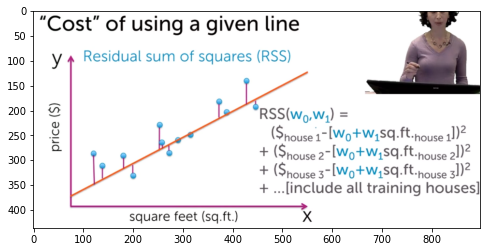

In [29]:
show_image("regression_7.png")

### Gradient Descent Algorithm to minimize the error

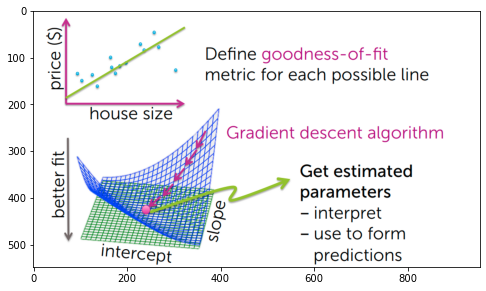

In [31]:
show_image("regression_8.png")

### Simple Linear Regression with Scikit Learn

In [37]:
import pandas as pd
import numpy as np

In [38]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 
              'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 
              'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 
              'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [42]:
sales = pd.read_csv('data/kc_house_data.csv', dtype=dtype_dict)
train_data = pd.read_csv('data/kc_house_train_data.csv', dtype=dtype_dict)
test_data = pd.read_csv('data/kc_house_test_data.csv', dtype=dtype_dict)

In [43]:
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0


In [45]:
# Let's compute the mean of the House Prices in King County in 2 different ways.
prices = sales['price'] # extract the price column of the sales SFrame -- this is now an SArray

# recall that the arithmetic average (the mean) is the sum of the prices divided by the total number of houses:
sum_prices = prices.sum()
num_houses = len(prices) # when prices is an SArray .size() returns its length
avg_price_1 = sum_prices/num_houses
avg_price_2 = prices.mean() # if you just want the average, the .mean() function
print("average price via method 1: " + str(avg_price_1))
print("average price via method 2: " + str(avg_price_2))

average price via method 1: 540088.1417665294
average price via method 2: 540088.1417665294


In [47]:
# if we want to multiply every price by 0.5 it's a simple as:
half_prices = 0.5*prices
# Let's compute the sum of squares of price. We can multiply two SArrays of the same length elementwise also with *
prices_squared = prices*prices
sum_prices_squared = prices_squared.sum() # price_squared is an SArray of the squares and we want to add them up.
print("the sum of price squared is: " + str(sum_prices_squared))

the sum of price squared is: 9217325138472070.0


### Build a generic simple linear regression function

- Takes two inputs - features and target(output)
- compute the mean of  input_feature and output
- compute the product of the output and the input_feature and its mean
- compute the squared value of the input_feature and its mean
- use the formula for the slope
- use the formula for the intercept

In [48]:
def simple_linear_regression(input_feature, output):
    n = len(input_feature)
    x = input_feature
    y = output
    
    # compute the mean of  input_feature and output
    x_mean = x.mean()
    y_mean = y.mean()
    
    # compute the product of the output and the input_feature and its mean
    sum_xy = (y * x).sum()
    xy_by_n = (y.sum() * x.sum())/n
               
    # compute the squared value of the input_feature and its mean
    x_square = (x**2).sum()
    xx_by_n = (x.sum() * x.sum())/n
               
    # use the formula for the slope
    slope = (sum_xy - xy_by_n) / (x_square - xx_by_n)
    
    # use the formula for the intercept
    intercept = y_mean - (slope * x_mean)
    return (intercept, slope)

In [50]:
test_feature = np.array(range(5))
test_output = np.array(1 + 1*test_feature)
(test_intercept, test_slope) =  simple_linear_regression(test_feature, test_output)
print("Intercept: " + str(test_intercept))
print("Slope: " + str(test_slope))

Intercept: 1.0
Slope: 1.0


In [52]:
sqft_intercept, sqft_slope = simple_linear_regression(train_data['sqft_living'].values, train_data['price'].values)

print("Intercept: " + str(sqft_intercept))
print("Slope: " + str(sqft_slope))

Intercept: -47116.07907289418
Slope: 281.9588396303426


### Predicting Values

In [53]:
def get_regression_predictions(input_feature, intercept, slope):
    # calculate the predicted values:
    predicted_values = intercept + (slope * input_feature)
    return predicted_values

In [54]:
my_house_sqft = 2650
estimated_price = get_regression_predictions(my_house_sqft, sqft_intercept, sqft_slope)
print("The estimated price for a house with %d squarefeet is $%.2f" % (my_house_sqft, estimated_price))

The estimated price for a house with 2650 squarefeet is $700074.85


### Residual Sum of Squares


RSS is the sum of the squares of the residuals is the difference between the predicted output and the true output.

In [57]:
def get_residual_sum_of_squares(input_feature, output, intercept, slope):
    # First get the predictions
    predicted_values = intercept + (slope * input_feature)
    # then compute the residuals (since we are squaring it doesn't matter which order you subtract)
    residuals = output - predicted_values
    # square the residuals and add them up
    RSS = (residuals * residuals).sum()
    return(RSS)

In [56]:
print(get_residual_sum_of_squares(test_feature, test_output, test_intercept, test_slope)) # should be 0.0

0.0


In [58]:
rss_prices_on_sqft = get_residual_sum_of_squares(train_data['sqft_living'], train_data['price'], sqft_intercept, sqft_slope)
print('The RSS of predicting Prices based on Square Feet is : ' + str(rss_prices_on_sqft))


The RSS of predicting Prices based on Square Feet is : 1201918354177283.0


### Predict the squarefeet given price


In [59]:
def inverse_regression_predictions(output, intercept, slope):
    # solve output = intercept + slope*input_feature for input_feature. Use this equation to compute the inverse predictions:
    estimated_feature = (output - intercept)/slope
    return estimated_feature

<b>Quiz Question: According to this function and the regression slope and intercept from (3) what is the estimated square-feet for a house costing $800,000?</b>

In [60]:
my_house_price = 800000
estimated_squarefeet = inverse_regression_predictions(my_house_price, sqft_intercept, sqft_slope)
print("The estimated squarefeet for a house worth $%.2f is %d" % (my_house_price, estimated_squarefeet))

The estimated squarefeet for a house worth $800000.00 is 3004


### New Model: estimate prices from bedrooms

We have made one model for predicting house prices using squarefeet, but there are many other features in the sales SFrame. Use your simple linear regression function to estimate the regression parameters from predicting Prices based on number of bedrooms. Use the training data!

In [62]:
# Estimate the slope and intercept for predicting 'price' based on 'bedrooms'
sqft_intercept, sqft_slope = simple_linear_regression(train_data['bedrooms'].values, train_data['price'].values)

print("Intercept: " + str(sqft_intercept))
print("Slope: " + str(sqft_slope))

Intercept: 109473.1776229596
Slope: 127588.95293398784


### Test your Linear Regression Algorithm

Now we have two models for predicting the price of a house. How do we know which one is better? Calculate the RSS on the TEST data (remember this data wasn't involved in learning the model). Compute the RSS from predicting prices using bedrooms and from predicting prices using squarefeet.

<b>Quiz Question: Which model (square feet or bedrooms) has lowest RSS on TEST data? Think about why this might be the case.</b>

In [64]:
# Compute RSS when using bedrooms on TEST data:
sqft_intercept, sqft_slope = simple_linear_regression(train_data['bedrooms'].values, 
                                                      train_data['price'].values)
rss_prices_on_bedrooms = get_residual_sum_of_squares(test_data['bedrooms'].values, 
                                                     test_data['price'].values, 
                                                     sqft_intercept, sqft_slope)
print('The RSS of predicting Prices based on Bedrooms is : ' + str(rss_prices_on_bedrooms))

The RSS of predicting Prices based on Bedrooms is : 493364585960300.9


In [65]:
sqft_intercept, sqft_slope = simple_linear_regression(train_data['sqft_living'].values, 
                                                      train_data['price'].values)
rss_prices_on_sqft = get_residual_sum_of_squares(test_data['sqft_living'].values, 
                                                 test_data['price'].values, 
                                                 sqft_intercept, sqft_slope)
print('The RSS of predicting Prices based on Square Feet is : ' + str(rss_prices_on_sqft))

The RSS of predicting Prices based on Square Feet is : 275402933617812.12


## Tensorflow

TensorFlow is an open source framework for Machine Learning and Deep Learning by Google. In this notebook I am using Tensorfow 2.0 to build a simple Linear regression model.

### Get Some Data

In [66]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

data = pd.read_csv( 'data/Admission_Predict_Ver1.1.csv' )
data.head()

continuous_features = data[ ['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA'] ].values / 100 
categorical_research_features = data[ [ 'Research' ] ].values 

X = np.concatenate( [ continuous_features , categorical_research_features ] , axis=1 )
Y = data[ [ 'Chance of Admit ' ] ].values

train_features , test_features ,train_labels, test_labels = train_test_split( X , Y , test_size=0.2 )

X = tf.constant( train_features , dtype=tf.float32 )
Y = tf.constant( train_labels , dtype=tf.float32 ) 
                                                          
test_X = tf.constant( test_features , dtype=tf.float32 ) 
test_Y = tf.constant( test_labels , dtype=tf.float32 )

### Creating the model in TF 2.0

In [67]:
def mean_squared_error( Y , y_pred ):
    return tf.reduce_mean( tf.square( y_pred - Y ) )

def mean_squared_error_deriv( Y , y_pred ):
    return tf.reshape( tf.reduce_mean( 2 * ( y_pred - Y ) ) , [ 1 , 1 ] )
    
def h ( X , weights , bias ):
    return tf.tensordot( X , weights , axes=1 ) + bias

In [68]:
num_epochs = 10
num_samples = X.shape[0]
batch_size = 10
learning_rate = 0.001

dataset = tf.data.Dataset.from_tensor_slices(( X , Y )) 
dataset = dataset.shuffle( 500 ).repeat( num_epochs ).batch( batch_size )
iterator = dataset.__iter__()

In [69]:
num_features = X.shape[1]
weights = tf.random.normal( ( num_features , 1 ) ) 
bias = 0

epochs_plot = list()
loss_plot = list()

for i in range( num_epochs ) :
    
    epoch_loss = list()
    for b in range( int(num_samples/batch_size) ):
        x_batch , y_batch = iterator.get_next()
   
        output = h( x_batch , weights , bias ) 
        loss = epoch_loss.append( mean_squared_error( y_batch , output ).numpy() )
    
        dJ_dH = mean_squared_error_deriv( y_batch , output)
        dH_dW = x_batch
        dJ_dW = tf.reduce_mean( dJ_dH * dH_dW )
        dJ_dB = tf.reduce_mean( dJ_dH )
    
        weights -= ( learning_rate * dJ_dW )
        bias -= ( learning_rate * dJ_dB ) 
        
    loss = np.array( epoch_loss ).mean()
    epochs_plot.append( i + 1 )
    loss_plot.append( loss ) 
    
    print( 'Loss is {}'.format( loss ) ) 

Loss is 1.1639233827590942
Loss is 0.942471981048584
Loss is 0.8282496333122253
Loss is 0.7676801681518555
Loss is 0.7377514243125916
Loss is 0.7221637964248657
Loss is 0.7124596834182739
Loss is 0.705978274345398
Loss is 0.7025743126869202
Loss is 0.7006369829177856


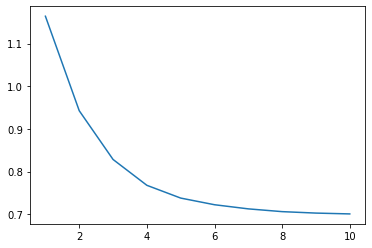

In [70]:
import matplotlib.pyplot as plt
plt.plot( epochs_plot , loss_plot ) 
plt.show()

In [71]:
output = h( test_X , weights , bias ) 
labels = test_Y

accuracy_op = tf.metrics.MeanAbsoluteError() 
accuracy_op.update_state( labels , output )
print( 'Mean Absolute Error = {}'.format( accuracy_op.result().numpy() ) )

Mean Absolute Error = 0.8139174580574036
